# Stock Index Intro KMeans Clustering 


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'


from sklearn.cluster import KMeans
from sklearn import preprocessing

In [138]:
from mpl_toolkits.mplot3d import Axes3D

In [139]:
start_date='2007-01-01'
end_date='2020-12-31'

scaleType='pwt'  #scale standardize

#my_features=['SIGNAL_MACD', 'MA_RSI']
my_features=['SIGNAL_MACD', 'MA_RSI','Close-To_Mid']
cols=['Price']+my_features
print(cols)

['Price', 'SIGNAL_MACD', 'MA_RSI', 'Close-To_Mid']


In [140]:
dfAll=pd.read_csv('data\SET50_W_ClusterTrend_07-Now.csv',parse_dates=['Date/Time'],dayfirst=True)

dfAll.rename(columns={'Date/Time':'Date'},inplace=True,)
dfAll['Date']=dfAll['Date'].apply( lambda  dx :  datetime(dx.year,dx.month,dx.day ))
dfAll.set_index('Date',inplace=True)
print(dfAll.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2007-01-05 to 2022-11-18
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ticker        829 non-null    object 
 1   SIGNAL_MACD   829 non-null    float64
 2   MA_RSI        829 non-null    float64
 3   Close-To_Mid  829 non-null    float64
 4   Price         829 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.9+ KB
None


In [141]:
dfTest=dfAll[end_date:][cols]
print(dfTest.info())
dfTest.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-01-08 to 2022-11-18
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         98 non-null     float64
 1   SIGNAL_MACD   98 non-null     float64
 2   MA_RSI        98 non-null     float64
 3   Close-To_Mid  98 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB
None


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid
Date,,,,
2022-10-21,961.60,-2.89,44.24,-6.09
2022-10-28,976.57,-2.99,44.34,8.88
2022-11-04,989.77,-2.78,46.68,22.08
2022-11-11,1001.30,-2.24,49.99,33.61
2022-11-18,981.62,-1.73,52.53,13.93


In [142]:
df=dfAll[start_date:end_date][cols]
print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2007-01-05 to 2020-12-30
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         731 non-null    float64
 1   SIGNAL_MACD   731 non-null    float64
 2   MA_RSI        731 non-null    float64
 3   Close-To_Mid  731 non-null    float64
dtypes: float64(4)
memory usage: 28.6 KB
None


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid
Date,,,,
2020-12-04,940.17,-14.22,55.15,101.02
2020-12-09,958.49,-10.28,59.25,116.34
2020-12-18,947.28,-6.32,60.68,92.84
2020-12-25,918.35,-2.83,60.45,63.91
2020-12-30,910.45,0.11,59.35,56.01


# Scale Data

In [143]:
zScaler = preprocessing.StandardScaler().fit(df[my_features]) # create StandardScaler instance
zScaledData=zScaler.transform(df[my_features]) # calc z-score

print(zScaledData.shape)
print(zScaledData[:5].round(4)) # 2D numpy array

z_features = [f'zScale_{c}' for c in my_features]
print(z_features)


(731, 3)
[[-0.0882 -0.6244 -0.8253]
 [-0.1561 -0.9468 -0.4965]
 [-0.2228 -1.2091 -0.3329]
 [-0.2859 -1.2091 -0.3602]
 [-0.338  -1.1548 -0.1961]]
['zScale_SIGNAL_MACD', 'zScale_MA_RSI', 'zScale_Close-To_Mid']


In [144]:
## Yeo-Johnson transformation (preferable)
pwtScaler = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True).fit(df[my_features]) # support only positive value
pwtScaledData=pwtScaler.transform(df[my_features]) # calc power transform

print(pwtScaledData.shape)
print(pwtScaledData[:5].round(4)) # 2D numpy array

pwt_features = [f'pwtScale_{c}' for c in my_features]
print(pwt_features)


(731, 3)
[[-0.2834 -0.6515 -0.893 ]
 [-0.3537 -0.9598 -0.6385]
 [-0.4164 -1.2049 -0.5035]
 [-0.4724 -1.2049 -0.5268]
 [-0.5171 -1.1546 -0.3727]]
['pwtScale_SIGNAL_MACD', 'pwtScale_MA_RSI', 'pwtScale_Close-To_Mid']


In [145]:
dfScaled=pd.concat([df.reset_index(),pd.DataFrame(zScaledData, columns=z_features), pd.DataFrame(pwtScaledData, columns=pwt_features)], axis=1)
print(dfScaled.info())
dfScaled.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   731 non-null    datetime64[ns]
 1   Price                  731 non-null    float64       
 2   SIGNAL_MACD            731 non-null    float64       
 3   MA_RSI                 731 non-null    float64       
 4   Close-To_Mid           731 non-null    float64       
 5   zScale_SIGNAL_MACD     731 non-null    float64       
 6   zScale_MA_RSI          731 non-null    float64       
 7   zScale_Close-To_Mid    731 non-null    float64       
 8   pwtScale_SIGNAL_MACD   731 non-null    float64       
 9   pwtScale_MA_RSI        731 non-null    float64       
 10  pwtScale_Close-To_Mid  731 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 62.9 KB
None


,Date,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,zScale_SIGNAL_MACD,zScale_MA_RSI,zScale_Close-To_Mid,pwtScale_SIGNAL_MACD,pwtScale_MA_RSI,pwtScale_Close-To_Mid
726,2020-12-04,940.17,-14.22,55.15,101.02,-1.013507,0.151434,1.740442,-1.039714,0.120629,2.079460
727,2020-12-09,958.49,-10.28,59.25,116.34,-0.774600,0.493859,2.043553,-0.862702,0.473772,2.489565
728,2020-12-18,947.28,-6.32,60.68,92.84,-0.534481,0.613290,1.578598,-0.677431,0.598617,1.862266
729,2020-12-25,918.35,-2.83,60.45,63.91,-0.322861,0.594080,1.006209,-0.504216,0.578480,1.105967
730,2020-12-30,910.45,0.11,59.35,56.01,-0.144590,0.502210,0.849905,-0.342222,0.482474,0.903279


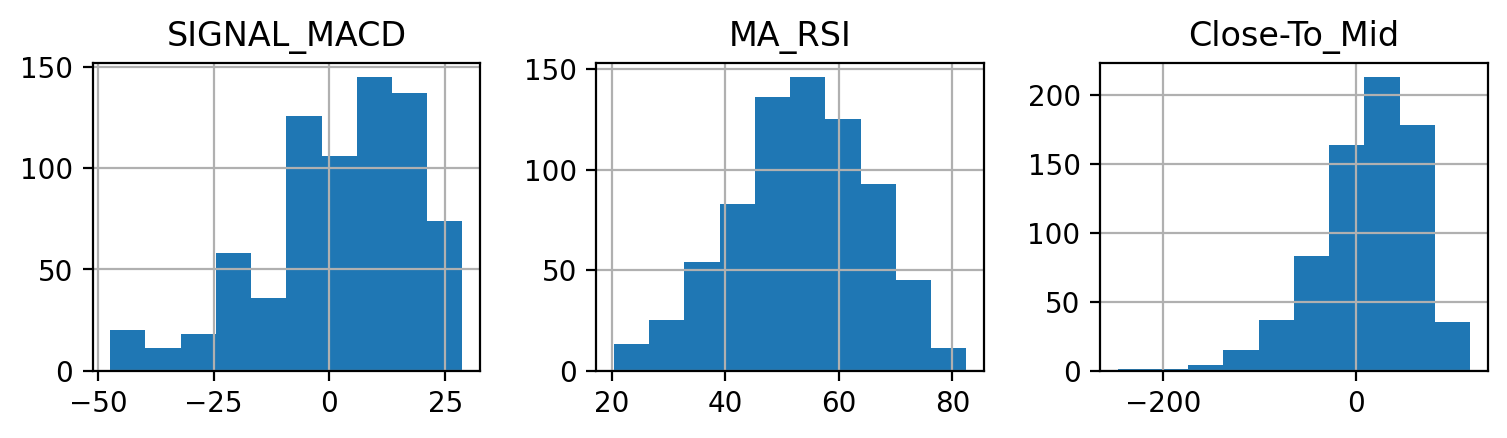

In [146]:
dfScaled[my_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2));

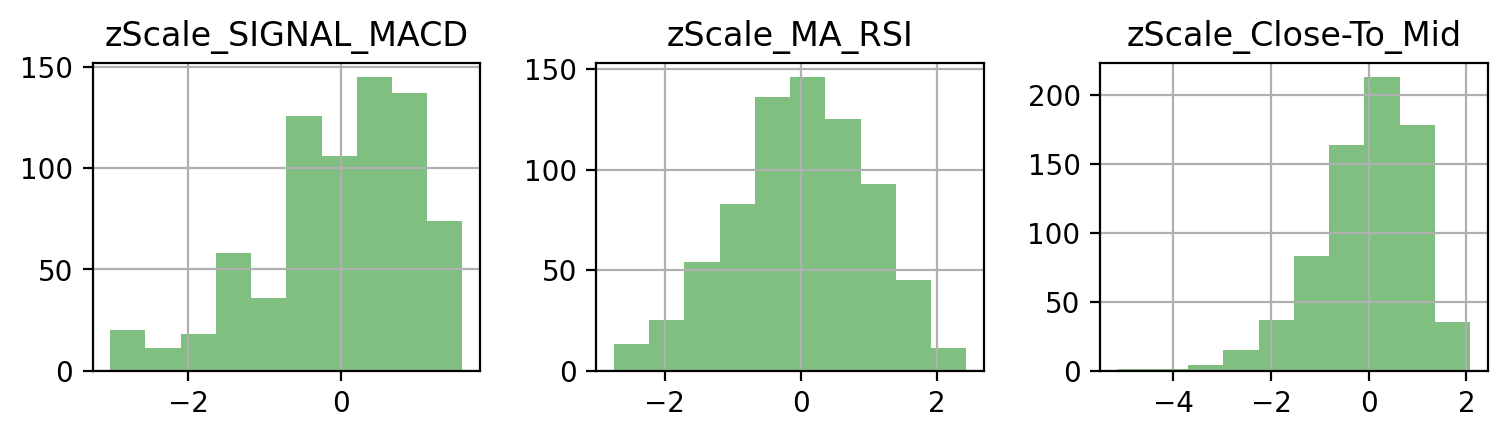

In [147]:
dfScaled[z_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2),color='green',alpha=.5);

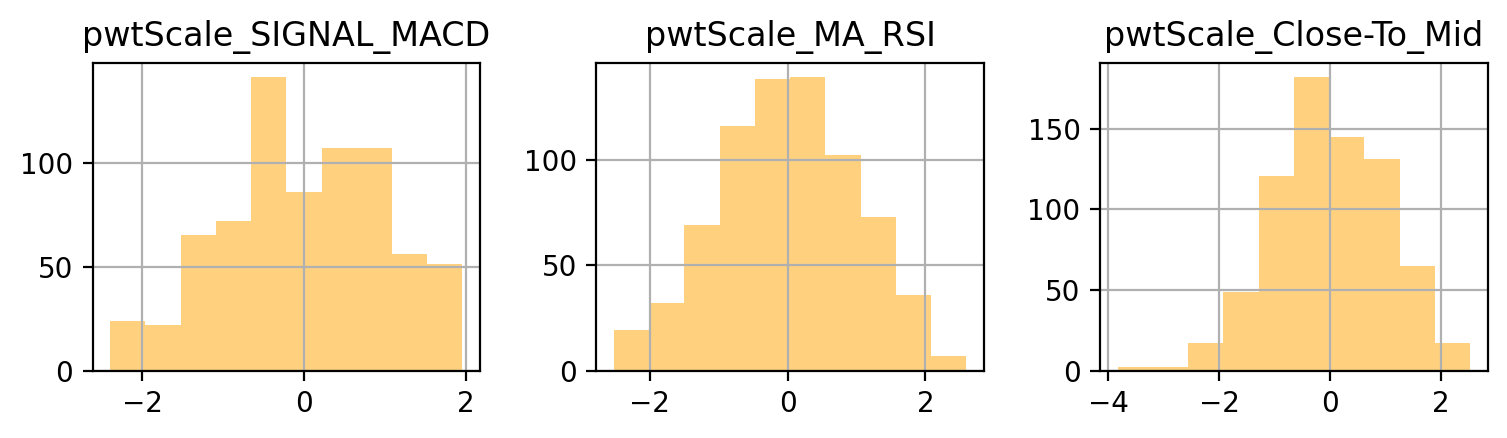

In [148]:
dfScaled[pwt_features].hist(layout=(1, len(my_features)), figsize=(3*len(my_features), 2),color='orange',alpha=.5);

In [149]:
print(scaleType)
if scaleType=='z':
 X=pd.DataFrame(zScaledData, columns=my_features) ## z-score  (preferable)
elif scaleType=='pwt':
 X=pd.DataFrame(pwtScaledData, columns=my_features) ## power transformation 
X.head()

pwt


,SIGNAL_MACD,MA_RSI,Close-To_Mid
0,-0.283416,-0.651456,-0.892965
1,-0.353670,-0.959848,-0.638507
2,-0.416437,-1.204881,-0.503502
3,-0.472391,-1.204881,-0.526776
4,-0.517088,-1.154603,-0.372720


## Scatter matrix with transformed data

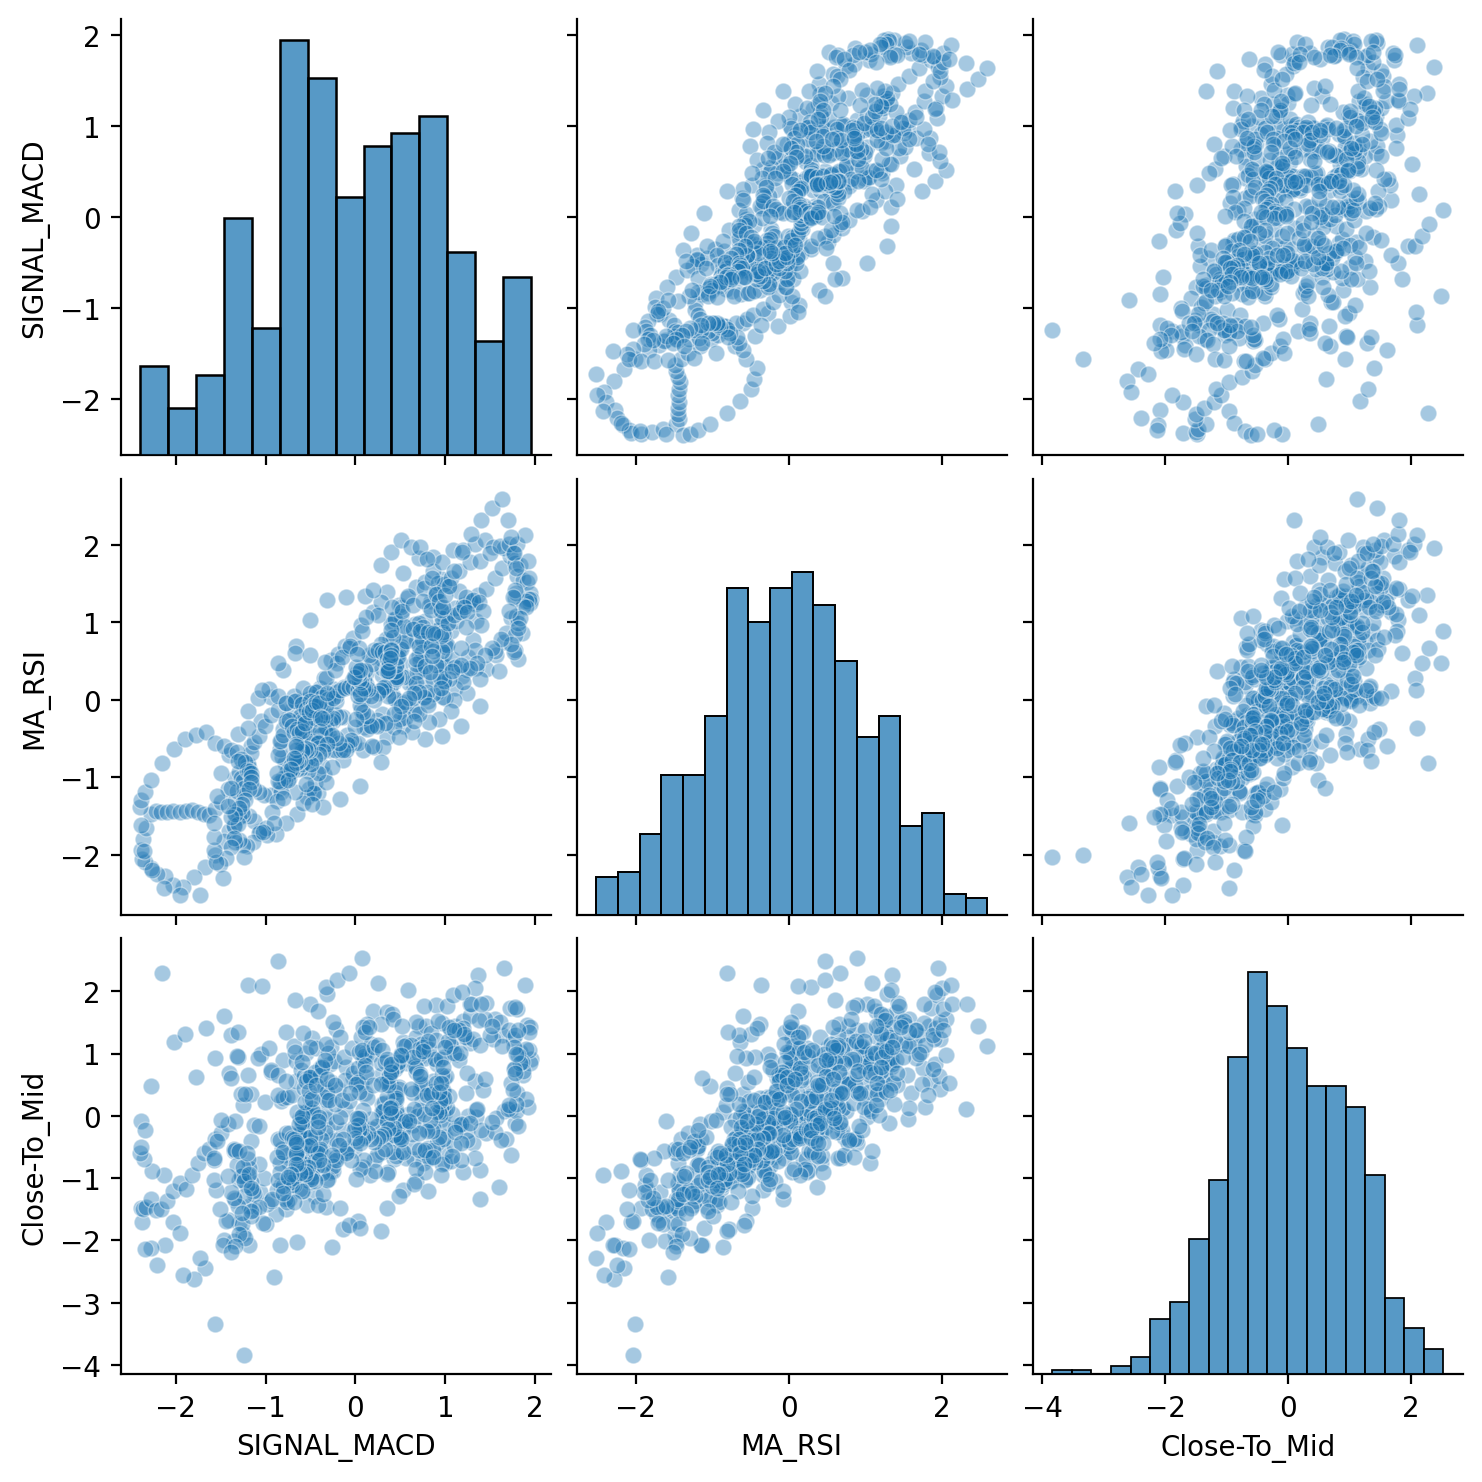

In [150]:
sns.pairplot(X, plot_kws={'alpha': .4});

# Optimal number of clusters eBlow

In [151]:
ssd=[]
for k in range(2, 7):
    m=KMeans(n_clusters=k)
    m.fit(X)
    ssd.append([k, m.inertia_])
xy=np.array(ssd)
print(xy)

[[   2.         1031.79241858]
 [   3.          729.36419563]
 [   4.          559.54844329]
 [   5.          441.3569901 ]
 [   6.          387.59870945]]


In [152]:
dd=pd.DataFrame(ssd, columns=['k', 'ssd'])
dd['pct_chg']=dd['ssd'].pct_change() * 100
dd

,k,ssd,pct_chg
0,2,1031.792419,NaN
1,3,729.364196,-29.310956
2,4,559.548443,-23.282710
3,5,441.356990,-21.122649
4,6,387.598709,-12.180226


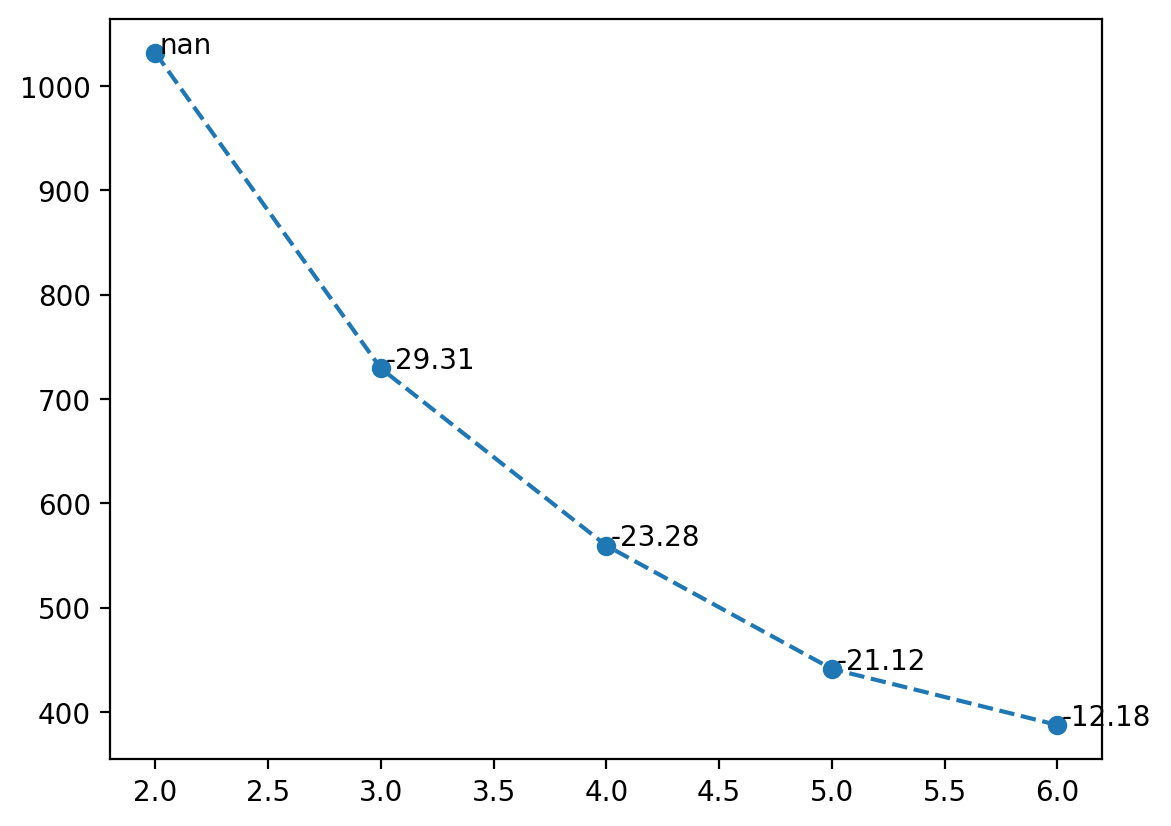

In [153]:
plt.plot(dd['k'], dd['ssd'], linestyle='--', marker='o')
# plt.plot(xy[:, 0], xy[:, 1], '--o')
for index, row in dd.iterrows():
    plt.text(row['k']+.02, row['ssd']+.02, f'{row["pct_chg"]:.2f}', fontsize=10)

# Scikit-learn: KMeans Clustering

In [154]:
your_number_cluster=4

In [155]:
model=KMeans(n_clusters=your_number_cluster)
model

KMeans(n_clusters=4)

In [156]:
print(X[:5])
model.fit(X)

   SIGNAL_MACD    MA_RSI  Close-To_Mid
0    -0.283416 -0.651456     -0.892965
1    -0.353670 -0.959848     -0.638507
2    -0.416437 -1.204881     -0.503502
3    -0.472391 -1.204881     -0.526776
4    -0.517088 -1.154603     -0.372720


KMeans(n_clusters=4)

In [157]:
model.cluster_centers_
#model.transform(X) # the distance between each point and centroid

array([[ 0.55390278,  0.14776327, -0.31279541],
       [ 1.01894728,  1.24409676,  1.00922379],
       [-1.07306255, -1.23468122, -1.14914096],
       [-0.57495828, -0.15160762,  0.58037566]])

In [158]:
df['cluster']=model.labels_
X['cluster']=model.labels_
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2007-01-05 to 2020-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         731 non-null    float64
 1   SIGNAL_MACD   731 non-null    float64
 2   MA_RSI        731 non-null    float64
 3   Close-To_Mid  731 non-null    float64
 4   cluster       731 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 31.4 KB
None


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,cluster
Date,,,,,
2007-01-05,436.50,1.04,45.86,-28.66,2
2007-01-12,453.12,-0.08,42.00,-12.04,2
2007-01-19,461.39,-1.18,38.86,-3.77,2
2007-01-26,460.01,-2.22,38.86,-5.15,2
2007-02-02,468.30,-3.08,39.51,3.14,2


In [159]:
dfStat=(df.groupby('cluster',as_index=True).describe()).T
dfStat

cluster                       0            1            2            3
Price        count   193.000000   187.000000   192.000000   159.000000
             mean    819.446580   839.661123   783.467292   870.353711
             std     211.157588   226.807787   265.327164   222.240232
             min     476.190000   403.690000   272.890000   332.830000
             25%     597.730000   639.740000   553.422500   729.185000
             50%     841.500000   874.810000   867.075000   920.520000
             75%     997.240000  1034.390000   992.875000  1030.450000
             max    1177.590000  1194.870000  1126.250000  1159.540000
SIGNAL_MACD  count   193.000000   187.000000   192.000000   159.000000
             mean     12.051606    17.733155   -15.680208    -5.081384
             std       6.011072     6.624494    13.625970     9.630802
             min      -1.740000     0.570000   -47.350000   -44.210000
             25%       7.940000    12.815000   -22.425000    -7.255000
             50%      11.380000    17.240000   -13.130000    -3.150000
             75%      16.570000    23.250000    -4.892500     0.590000
             max      26.230000    28.720000     8.770000     7.470000
MA_RSI       count   193.000000   187.000000   192.000000   159.000000
             mean     55.414404    67.874118    38.304896    51.869371
             std       4.567125     5.083217     6.649445     4.682164
             min      45.840000    59.080000    20.420000    39.710000
             25%      51.630000    63.945000    34.622500    48.400000
             50%      56.210000    67.510000    39.335000    52.000000
             75%      58.540000    71.300000    43.662500    54.940000
             max      66.150000    82.420000    48.940000    65.520000
Close-To_Mid count   193.000000   187.000000   192.000000   159.000000
             mean      3.608290    59.878021   -47.596563    42.686415
             std      20.797354    21.024226    41.545797    25.074380
             min     -69.400000    12.870000  -246.580000    -8.410000
             25%      -8.220000    45.725000   -69.167500    22.295000
             50%       6.690000    59.510000   -38.190000    42.660000
             75%      18.130000    74.575000   -17.715000    58.910000
             max      50.220000   117.840000    16.920000   116.340000

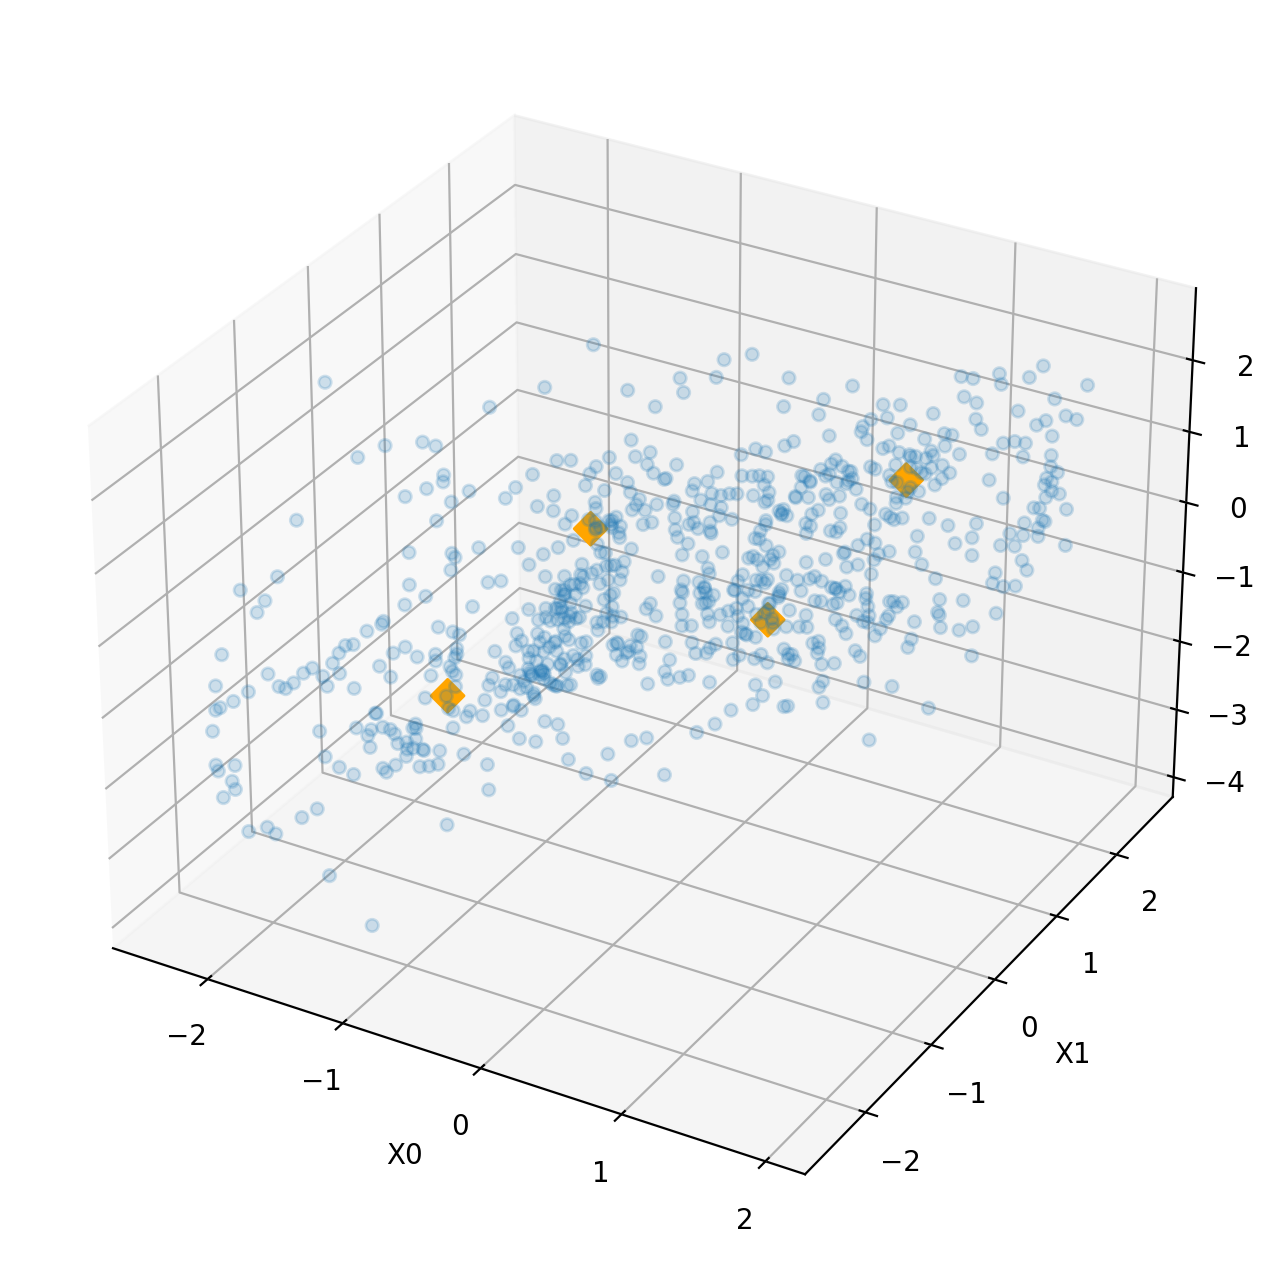

In [160]:
if len(my_features)==2:
    # 2 dimension
    if your_number_cluster==3:
     sns.scatterplot(data=X, x=my_features[0], y=my_features[1], hue='cluster', alpha=.5, palette=['blue', 'gray', 'yellow'])
    elif your_number_cluster==4:
     sns.scatterplot(data=X, x=my_features[0], y=my_features[1], hue='cluster', alpha=.5, palette=['blue', 'gray', 'yellow','green'])
    # 2 feature
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color='.1', marker='D')
elif len(my_features)==3:
    XArray=X.values
    
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(XArray[:, 0], XArray[:, 1], XArray[:, 2], alpha=.2)
    ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], model.cluster_centers_[:, 2], color='orange', alpha=1, marker='D', s=70)
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('X2');

# Map ClsterLabel  To Amibroker

In [161]:
if  your_number_cluster==3:
 dict_clusterToAB={0:'3', 1:'2', 2:'1'}
elif  your_number_cluster==4:
 dict_clusterToAB={0:'3', 1:'4', 2:'1',3:'2'}

In [162]:
df['MarketTrend'] = df['cluster'].map(dict_clusterToAB)
#df[['Price','MarketTrend']].to_csv( 'ab-visual/TrainCluster3Trend-S50-ZScale.csv')
print(df['MarketTrend'].unique())
df.tail()

['1' '2' '3' '4']


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,cluster,MarketTrend
Date,,,,,,
2020-12-04,940.17,-14.22,55.15,101.02,3,2
2020-12-09,958.49,-10.28,59.25,116.34,3,2
2020-12-18,947.28,-6.32,60.68,92.84,3,2
2020-12-25,918.35,-2.83,60.45,63.91,3,2
2020-12-30,910.45,0.11,59.35,56.01,3,2


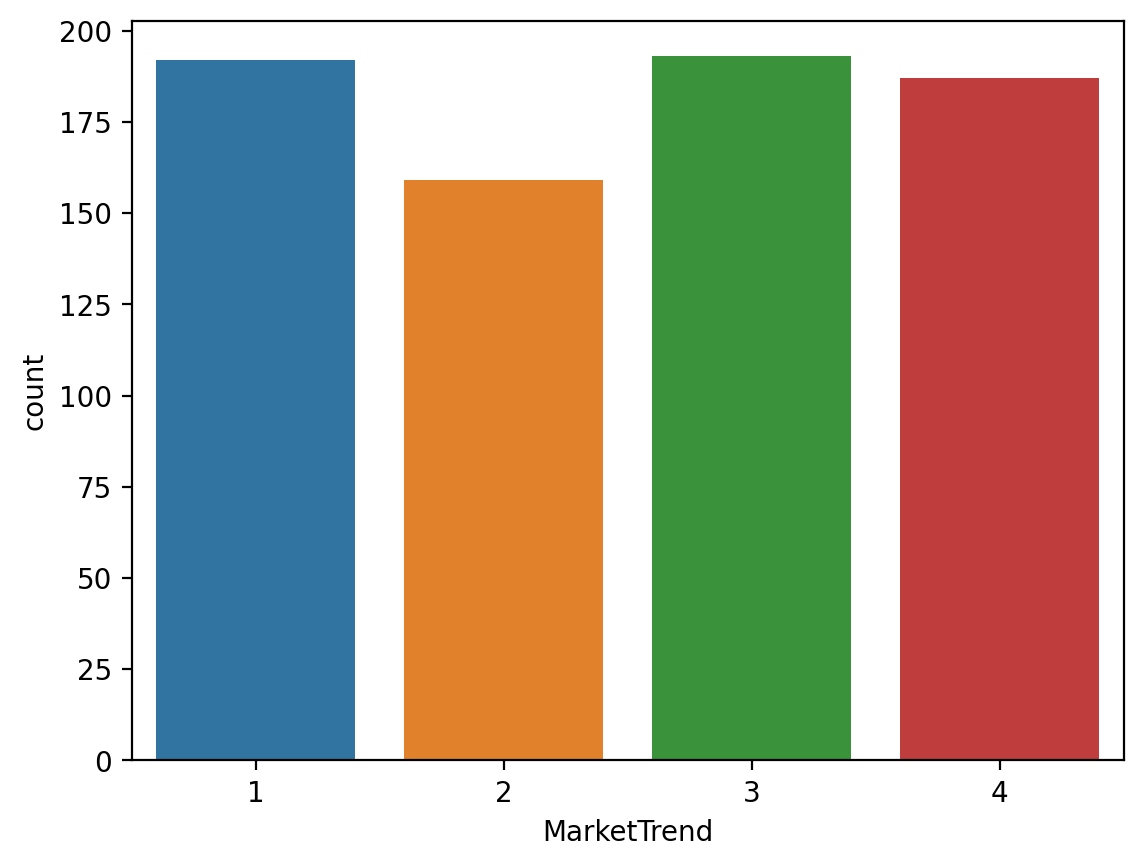

In [163]:
sns.countplot(x='MarketTrend', data=df);

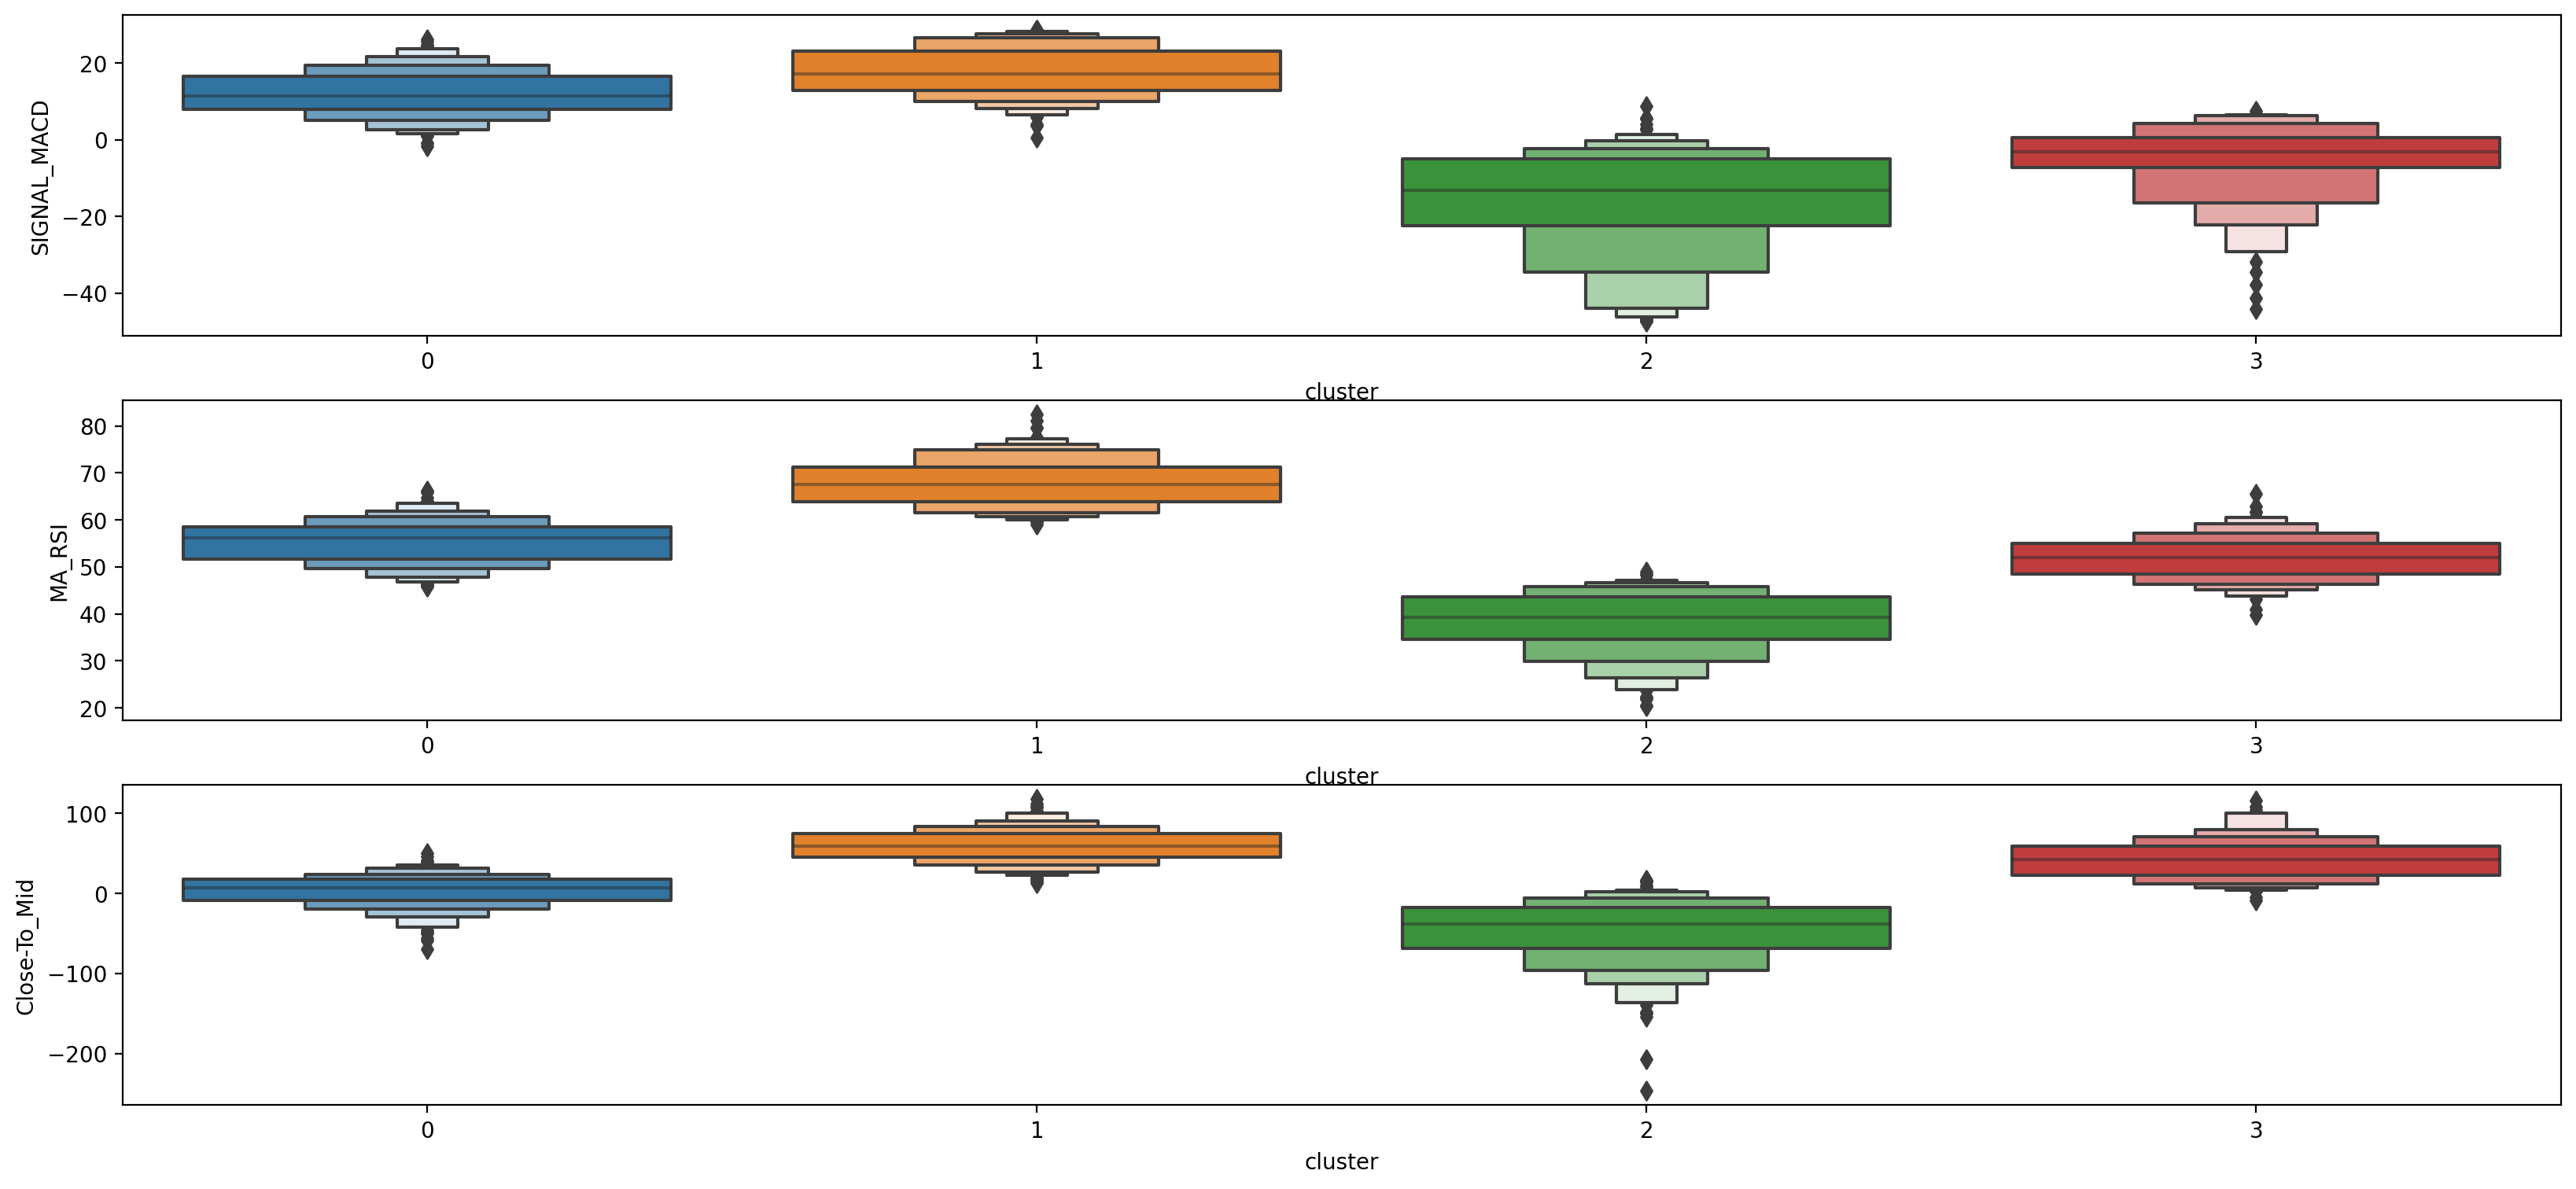

In [164]:
# fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(12,9), sharex=True,)

# ax1.plot(df['Close'])
# ax2.bar(df.index,df['MarketLabel'])
# ax3.plot(df[my_features[0]])
# ax4.plot(df[my_features[1]])

# plt.show()

fig, ax = plt.subplots(nrows=len(my_features), ncols=1, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(my_features):
    sns.boxenplot(x='cluster', y=col, data=df, ax=ax[i])

# Raw data (no scaling)

In [165]:
df.groupby('cluster').median()

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_15356\704907052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').median()


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid
cluster,,,,
0,841.500,11.38,56.210,6.69
1,874.810,17.24,67.510,59.51
2,867.075,-13.13,39.335,-38.19
3,920.520,-3.15,52.000,42.66


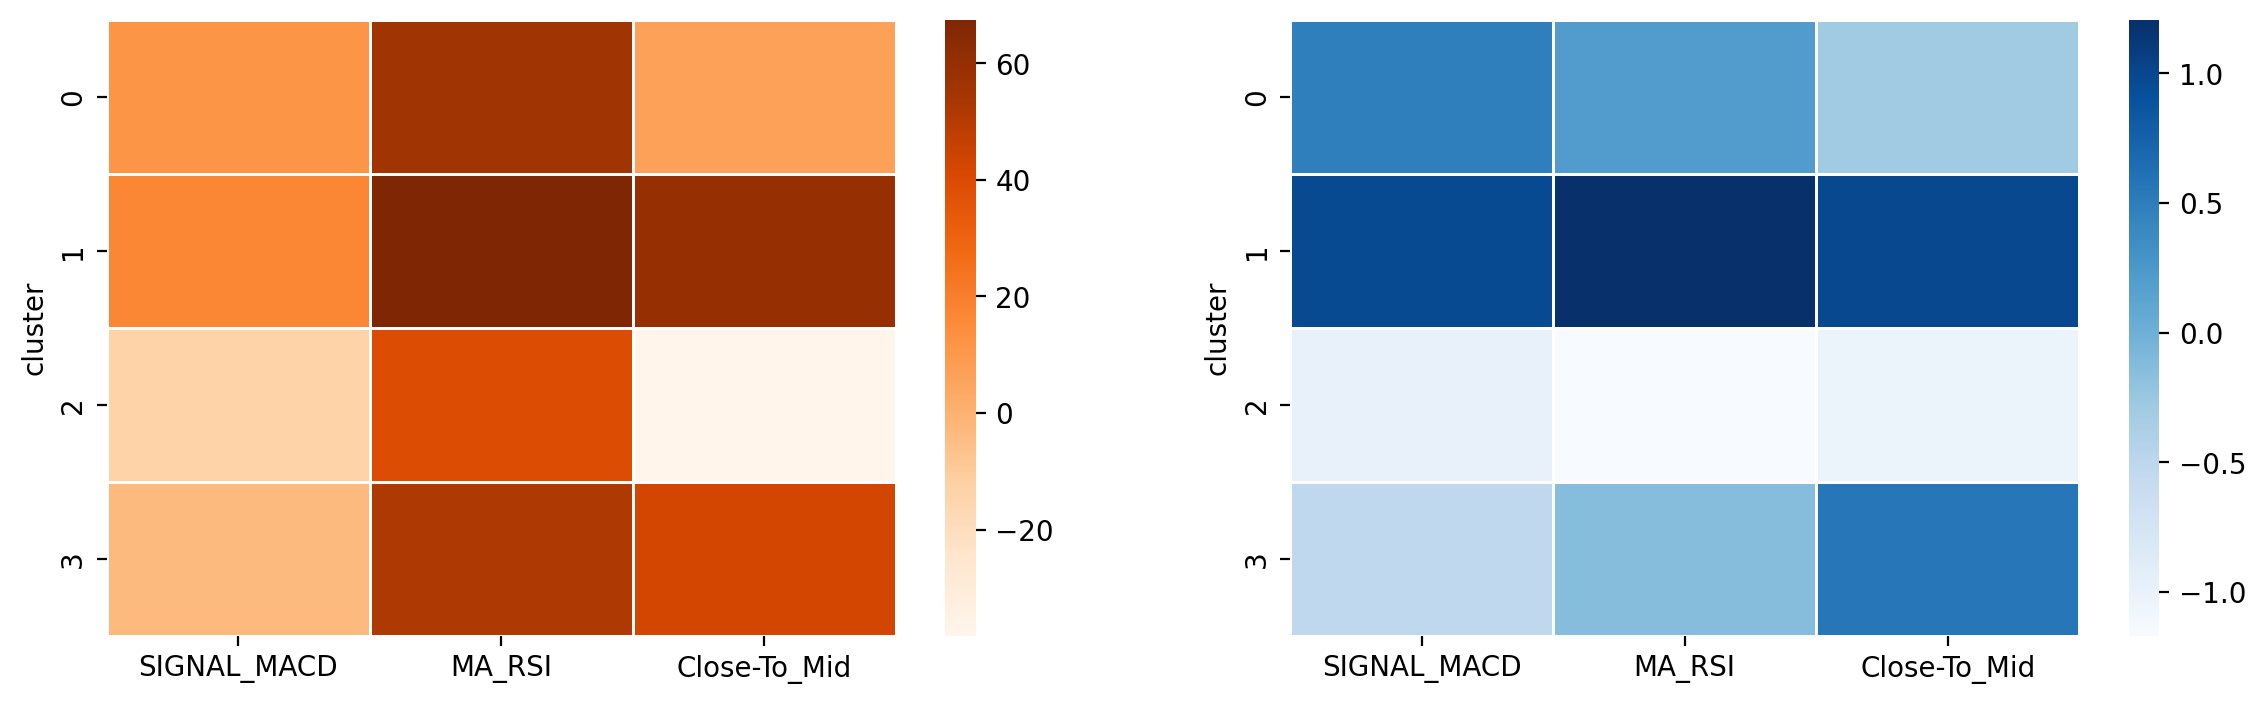

In [166]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax=ax.ravel()
sns.heatmap(df[my_features+['cluster']].groupby('cluster').median(), cmap="Oranges", linewidths=1, ax=ax[0]);
sns.heatmap(X[my_features+['cluster']].groupby('cluster').median(), cmap="Blues", linewidths=1, ax=ax[1]);

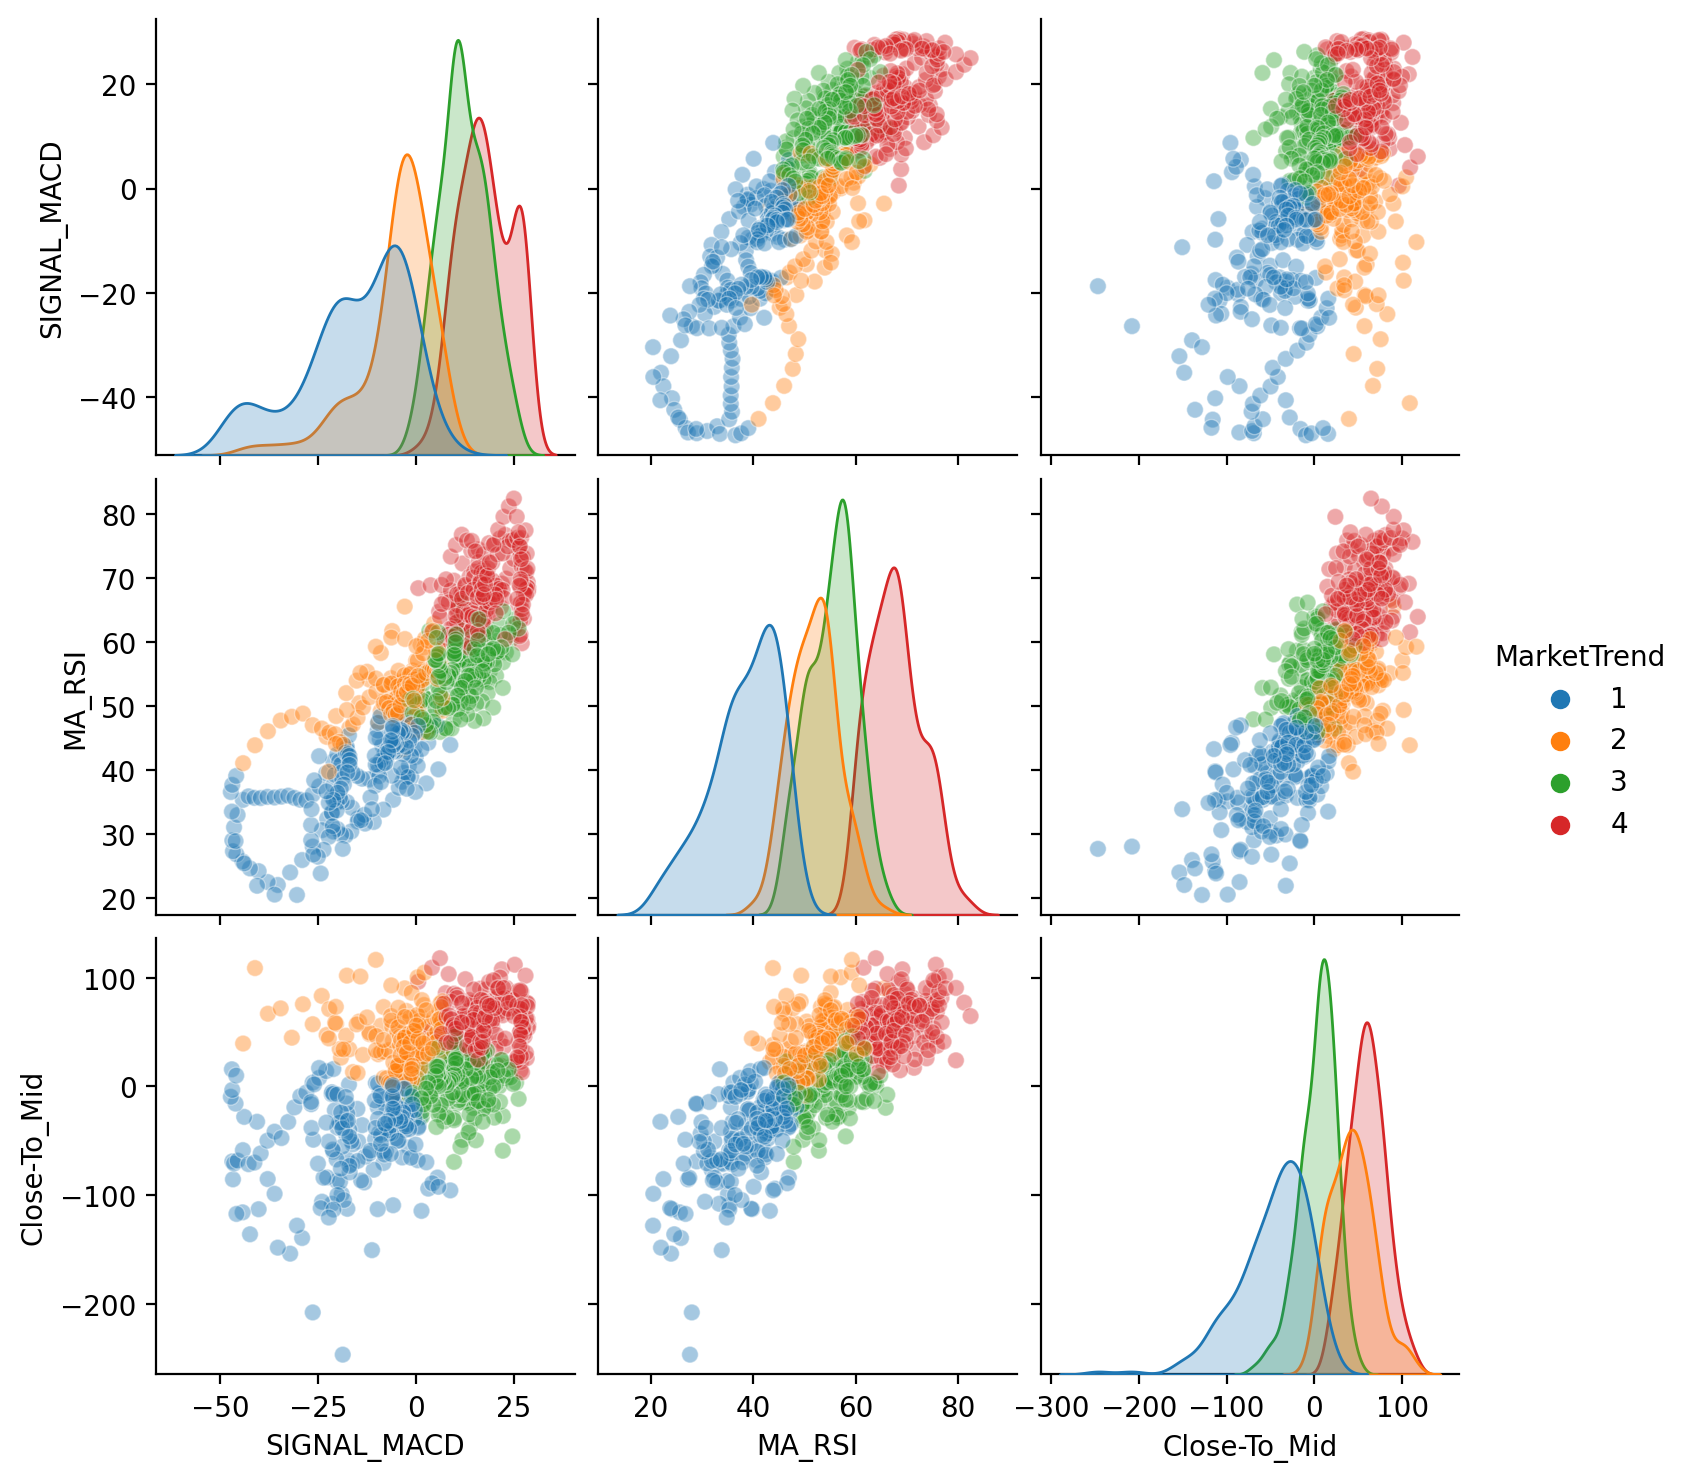

In [167]:
sns.pairplot(df, vars=my_features, 
             hue='MarketTrend',
             plot_kws={'alpha': .4});

In [168]:
df.groupby('MarketTrend').head(5).sort_values('MarketTrend')

,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,cluster,MarketTrend
Date,,,,,,
2007-01-05,436.50,1.04,45.86,-28.66,2,1
2007-01-12,453.12,-0.08,42.00,-12.04,2,1
2007-01-19,461.39,-1.18,38.86,-3.77,2,1
2007-01-26,460.01,-2.22,38.86,-5.15,2,1
2007-02-02,468.30,-3.08,39.51,3.14,2,1
2007-03-02,476.40,-3.97,48.08,11.24,3,2
2007-02-23,484.43,-3.92,46.89,19.27,3,2
2007-03-09,469.74,-4.04,48.23,4.58,3,2
2007-02-09,487.58,-3.56,43.21,22.42,3,2


# Predict 2021-22

In [169]:
print("Scale data for predict and take it as dataframe")
if scaleType=='z':
 testScaled=zScaler.transform(dfTest[my_features])
elif scaleType=='pwt':
 testScaled=pwtScaler.transform(dfTest[my_features])

print(testScaled.shape)
print(testScaled[:5])    
testScaled_df=pd.DataFrame(testScaled,columns=my_features)
print(testScaled_df.info())
testScaled_df.head()

Scale data for predict and take it as dataframe
(98, 3)
[[-0.13098184  0.50860759  2.67314258]
 [ 0.08504211  0.44595098  2.02809724]
 [ 0.27258857  0.36707245  1.3606574 ]
 [ 0.4091992   0.31353266  0.76740311]
 [ 0.5184548   0.31956924  1.20023205]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SIGNAL_MACD   98 non-null     float64
 1   MA_RSI        98 non-null     float64
 2   Close-To_Mid  98 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB
None


,SIGNAL_MACD,MA_RSI,Close-To_Mid
0,-0.130982,0.508608,2.673143
1,0.085042,0.445951,2.028097
2,0.272589,0.367072,1.360657
3,0.409199,0.313533,0.767403
4,0.518455,0.319569,1.200232


In [170]:
print(f"Predict data with {my_features}")
testLabelCluster=model.predict(testScaled_df)
testScaled_df['cluster']=testLabelCluster

testScaled_df.drop(columns=my_features,inplace=True)
dfTest=pd.concat([dfTest.reset_index(),testScaled_df],axis=1)
dfTest['MarketTrend'] = dfTest['cluster'].map(dict_clusterToAB)
dfTest=dfTest.set_index('Date')

#dfTest[['Price','MarketTrend']].to_csv( 'ab-visual/TestCluster3Trend-S50-ZScale.csv')
print(dfTest.info())

dfTest.tail(10)

Predict data with ['SIGNAL_MACD', 'MA_RSI', 'Close-To_Mid']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2021-01-08 to 2022-11-18
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         98 non-null     float64
 1   SIGNAL_MACD   98 non-null     float64
 2   MA_RSI        98 non-null     float64
 3   Close-To_Mid  98 non-null     float64
 4   cluster       98 non-null     int32  
 5   MarketTrend   98 non-null     object 
dtypes: float64(4), int32(1), object(1)
memory usage: 5.0+ KB
None


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,cluster,MarketTrend
Date,,,,,,
2022-09-16,981.42,-2.66,53.39,14.14,3,2
2022-09-23,980.86,-2.13,53.03,13.17,3,2
2022-09-30,954.44,-1.95,50.43,-13.25,0,3
2022-10-07,946.51,-2.10,48.21,-21.18,2,1
2022-10-12,937.91,-2.55,45.03,-29.78,2,1
2022-10-21,961.60,-2.89,44.24,-6.09,2,1
2022-10-28,976.57,-2.99,44.34,8.88,3,2
2022-11-04,989.77,-2.78,46.68,22.08,3,2
2022-11-11,1001.30,-2.24,49.99,33.61,3,2


In [171]:
dfAll=pd.concat([df,dfTest])
print(dfAll.info())
dfAll.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2007-01-05 to 2022-11-18
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         829 non-null    float64
 1   SIGNAL_MACD   829 non-null    float64
 2   MA_RSI        829 non-null    float64
 3   Close-To_Mid  829 non-null    float64
 4   cluster       829 non-null    int32  
 5   MarketTrend   829 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 42.1+ KB
None


,Price,SIGNAL_MACD,MA_RSI,Close-To_Mid,cluster,MarketTrend
Date,,,,,,
2007-01-05,436.50,1.04,45.86,-28.66,2,1
2007-01-12,453.12,-0.08,42.00,-12.04,2,1
2007-01-19,461.39,-1.18,38.86,-3.77,2,1
2007-01-26,460.01,-2.22,38.86,-5.15,2,1
2007-02-02,468.30,-3.08,39.51,3.14,2,1


In [172]:
if len(my_features)==2:
    if scaleType=='z' and your_number_cluster==3:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/Cluster3Trend-S50-ZScale.csv')
    elif scaleType=='pwt' and your_number_cluster==3:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/Cluster3Trend-S50-PwtScale.csv')
    elif scaleType=='z' and your_number_cluster==4:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/Cluster4-S50-ZScale.csv')
    elif scaleType=='pwt' and your_number_cluster==4:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/Cluster4-S50-PwtScale.csv')

In [173]:
if len(my_features)==3:
    if scaleType=='z' and your_number_cluster==3:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/3XCluster3Trend-S50-ZScale.csv')
    elif scaleType=='pwt' and your_number_cluster==3:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/3XCluster3Trend-S50-PwtScale.csv')
    elif scaleType=='z' and your_number_cluster==4:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/3XCluster4-S50-ZScale.csv')
    elif scaleType=='pwt' and your_number_cluster==4:
     dfAll[['Price','MarketTrend']].to_csv( 'ab-visual/3XCluster4-S50-PwtScale.csv')